In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/'My Drive'/programming/fast/digikala/q1

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/My Drive/programming/fast/digikala/q1'
/content


In [2]:
%cd drive/'My Drive'

/content/drive/My Drive


In [5]:
%ls

models/  q1/  q2/  q3/  q4/  q5/


In [6]:
%cd q1

/content/drive/.shortcut-targets-by-id/1wYJr2d7S9xQLmTVF_Ghnn5mZsJtDNyXJ/digikala/q1


In [7]:
pwd = %pwd


In [8]:
import pandas as pd
import numpy as np
from fastai import *
from fastai.tabular import *

import matplotlib.pyplot as plt
from datetime import datetime

In [9]:
df = pd.read_csv('train.csv')
df.head(20)

,id,date,seller,item,sales
0,0,2015-05-01,1,1,21
1,1,2015-05-01,2,1,45
2,2,2015-05-01,3,1,28
3,3,2015-05-01,4,1,34
4,4,2015-05-01,5,1,21
5,5,2015-05-01,6,1,21
6,6,2015-05-01,7,1,27
7,7,2015-05-01,8,1,27
8,8,2015-05-01,9,1,28
9,9,2015-05-01,10,1,25


In [10]:
def dater(datestr,ind):
    date = datetime.strptime(datestr, '%Y-%m-%d')
    if ind == 0:
        return date.year
    elif ind ==1:
        return date.month
    elif ind == 2:
        return  date.day

In [19]:
df['year'] = df['date'].apply(lambda x: dater(x,0))
df['month'] = df['date'].apply(lambda x: dater(x,1))
df['day'] = df['date'].apply(lambda x: dater(x,2))

In [20]:
df['sales'] = df['sales'].apply(lambda x:float(x))

In [21]:
df

,id,date,seller,item,sales,year,month,day
0,0,2015-05-01,1,1,21.0,2015,5,1
1,1,2015-05-01,2,1,45.0,2015,5,1
2,2,2015-05-01,3,1,28.0,2015,5,1
3,3,2015-05-01,4,1,34.0,2015,5,1
4,4,2015-05-01,5,1,21.0,2015,5,1
...,...,...,...,...,...,...,...,...
899995,899995,2020-04-03,6,50,11.0,2020,4,3
899996,899996,2020-04-03,7,50,6.0,2020,4,3
899997,899997,2020-04-03,8,50,25.0,2020,4,3
899998,899998,2020-04-03,9,50,17.0,2020,4,3


In [13]:
df['sales'].min(), df['sales'].max()

(0.0, 231.0)

In [14]:
test = pd.read_csv('test.csv')
test['year'] = test['date'].apply(lambda x: dater(x,0))
test['month'] = test['date'].apply(lambda x: dater(x,1))
test['day'] = test['date'].apply(lambda x: dater(x,2))
TEST = test['id']
test =test.drop(['date','id'],axis=1)
test.head()


,seller,item,year,month,day
0,1,1,2020,4,4
1,2,1,2020,4,4
2,3,1,2020,4,4
3,4,1,2020,4,4
4,5,1,2020,4,4


In [22]:
dep_var = 'sales'
cat_names = ['seller','item','year','month','day']
cont_names = [] 

procs = [Categorify, FillMissing, Normalize]

In [23]:
data = TabularDataBunch.from_df(pwd, df,dep_var= dep_var, valid_idx = range(len(df)-50000, len(df)),
                                cat_names=cat_names, cont_names=cont_names,
                                procs = procs,test_df= test)
data

TabularDataBunch;

Train: LabelList (850000 items)
x: TabularList
seller 1; item 1; year 2015; month 5; day 1; ,seller 2; item 1; year 2015; month 5; day 1; ,seller 3; item 1; year 2015; month 5; day 1; ,seller 4; item 1; year 2015; month 5; day 1; ,seller 5; item 1; year 2015; month 5; day 1; 
y: FloatList
21.0,45.0,28.0,34.0,21.0
Path: /content/drive/.shortcut-targets-by-id/1wYJr2d7S9xQLmTVF_Ghnn5mZsJtDNyXJ/digikala/q1;

Valid: LabelList (50000 items)
x: TabularList
seller 1; item 48; year 2016; month 6; day 4; ,seller 2; item 48; year 2016; month 6; day 4; ,seller 3; item 48; year 2016; month 6; day 4; ,seller 4; item 48; year 2016; month 6; day 4; ,seller 5; item 48; year 2016; month 6; day 4; 
y: FloatList
50.0,68.0,51.0,58.0,34.0
Path: /content/drive/.shortcut-targets-by-id/1wYJr2d7S9xQLmTVF_Ghnn5mZsJtDNyXJ/digikala/q1;

Test: LabelList (13000 items)
x: TabularList
seller 1; item 1; year 2020; month 4; day 4; ,seller 2; item 1; year 2020; month 4; day 4; ,seller 3; item 1; year 2

In [24]:
data.show_batch()

seller,item,year,month,day,target
9,44,2019,1,10,20.0
2,39,2017,5,30,76.0
2,6,2016,7,15,33.0
1,18,2015,6,17,76.0
5,36,2016,5,25,39.0


In [25]:
learner = tabular_learner(data,layers=[200,100],emb_szs={'item':50, 'year':5,'day':31,'seller':10,'month':12}, y_range=(-10,300),emb_drop=0.1)

In [26]:
learner.summary()

TabularModel
Layer (type)         Output Shape         Param #    Trainable 
Embedding            [10]                 110        True      
______________________________________________________________________
Embedding            [50]                 2,450      True      
______________________________________________________________________
Embedding            [5]                  35         True      
______________________________________________________________________
Embedding            [12]                 156        True      
______________________________________________________________________
Embedding            [31]                 992        True      
______________________________________________________________________
Dropout              [108]                0          False     
______________________________________________________________________
Linear               [200]                21,800     True      
_________________________________________________

In [27]:
learner.lr_find()

epoch,train_loss,valid_loss,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


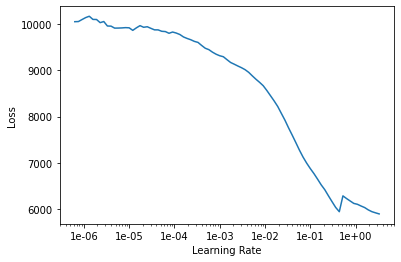

In [28]:
learner.recorder.plot()

In [29]:
learner.fit_one_cycle(15,slice(1e-03))

epoch,train_loss,valid_loss,time
0,114.330292,751.106628,01:46
1,104.351227,680.789917,01:46
2,95.485428,1022.396851,01:47
3,91.438965,971.792725,01:46
4,89.905205,1085.713867,01:46
5,92.465599,1127.385620,01:45
6,85.816322,1070.940430,01:45
7,89.857140,1148.332397,01:45
8,79.847229,1039.545654,01:45
9,82.977509,1284.076416,01:45


In [30]:
learner.save(pwd +'/freezed')

In [ ]:
learner.load(pwd +'/freezed')

In [ ]:
learner.export()

In [32]:
preds = []
for i in range(test.shape[0]):
    preds.append(learner.predict(test.iloc[i])[1])

In [33]:
DF = pd.DataFrame()
DF['id'] = TEST
DF['sales'] = preds

In [34]:
DF['sales'] = DF['sales'].apply(lambda x:int(x))

In [35]:
DF

,id,sales
0,0,34
1,1,49
2,2,44
3,3,40
4,4,29
...,...,...
12995,12995,52
12996,12996,47
12997,12997,87
12998,12998,75


In [36]:
DF.to_csv('salesfloat.csv')

In [ ]:
len(TEST)

13000